# Boosting
- ensemble method using several weak learners
- weak learners are trained sequentually
- each weak learner improves from the errors of its predecessors

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

## Load data from file

In [21]:
df = pd.read_csv('wbc.csv', index_col='id')
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Split data into training and testing set

In [22]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, stratify=y, random_state=42)

## Adaboost
- adaptive boosting
- predictor pays more attention to instances wrongly predicted by its predecessor
- predictors are weigthed by its training error to construct the final model

ROC AUC score: 0.997


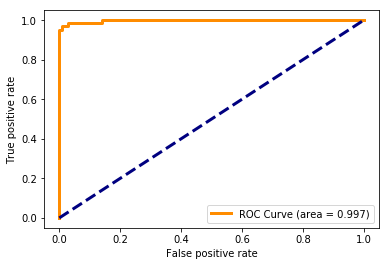

In [23]:
from sklearn.ensemble import AdaBoostClassifier

dt = DecisionTreeClassifier(max_depth=1, random_state=42)
adb_clf = AdaBoostClassifier(base_estimator=dt, n_estimators=100)
adb_clf.fit(X_train, y_train)
y_pred_proba = adb_clf.predict_proba(X_test)[:, 1]
score = roc_auc_score(y_test, y_pred_proba)
print('ROC AUC score: {:.3f}'.format(score))

# plot roc curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba, pos_label='M')
plt.plot(fpr, tpr, color='darkorange', label='ROC Curve (area = {:.3f})'.format(score), lw=3)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.legend()
plt.show()

## Load new data from file

In [24]:
df = pd.read_csv('auto.csv').drop('origin', axis=1)
X = df.drop('mpg', axis=1)
y = df['mpg']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)
df.head()

,mpg,displ,hp,weight,accel,size
0,18.0,250.0,88,3139,14.5,15.0
1,9.0,304.0,193,4732,18.5,20.0
2,36.1,91.0,60,1800,16.4,10.0
3,18.5,250.0,98,3525,19.0,15.0
4,34.3,97.0,78,2188,15.8,10.0


## Gradient Boosting
- each predictor is trained using its predecessor's residual errors as labels (multiplied by a learning rate)
- cons: involves exhaustive search procedure
- each tree is trained to find the best split points and features

In [25]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor(n_estimators=300, max_depth=1)
gb_reg.fit(X_train, y_train)
y_pred = gb_reg.predict(X_test)
score = mean_squared_error(y_pred, y_test) ** 0.5
print('RMSE: {:.3f}'.format(score))

RMSE: 3.939


## Stochastic gradient boosting
- each tree is trained on a subset of training rows in the data
- sampling of the subset is done without replacement
- features are sampled when choosing split points
- results in further ensemble diversity
- adds further variance to the ensembple of trees

In [26]:
from sklearn.ensemble import  GradientBoostingRegressor

sgb_reg = GradientBoostingRegressor(
    max_depth=1,
    subsample=0.8,
    max_features=0.2,
    n_estimators=300)
sgb_reg.fit(X_train, y_train)
y_pred = sgb_reg.predict(X_test)
score = mean_squared_error(y_pred, y_test) ** 0.5
print('RMSE: {:.3f}'.format(score))

RMSE: 4.096
